In [ ]:
pip install wordcloud

In [167]:
from wordcloud import WordCloud

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [108]:
#API HH не позволяет считывать более 2000 вакансий
job_title = ["'Системный аналитик' OR 'System analyst' OR 'Бизнес-аналитик' OR 'Business analyst' OR 'Финансовый аналитик' OR 'Аналитик данных'\
                'Data Analyst' OR 'BI Аналитик' OR 'SQL Аналитик' OR'Продуктовый аналитик' OR 'Product Analyst' OR 'Маркетолог-аналитик' OR 'Marketing Analyst'"]  # Список вакансий для поиска
number_of_pages = 100  # необходимое количество страниц для парсинга

for job in job_title:
    data = []
    
    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {
            'text': job, 
            'area': '113', 
            'per_page': '20', 
            'page': i,
            'search_field': 'name'  # Ограничивает поиск по названию вакансии
        }
        r = requests.get(url, params=par)
        e = r.json()
        data.extend(e['items'])
    
    # Создание DataFrame после сбора всех данных
    if data:
        vacancy_details = data[0].keys()
        df = pd.DataFrame(data, columns=vacancy_details)
        
        # Сохранение в CSV-файл
        csv_name = "Аналитики.csv"
        df.to_csv(csv_name, index=False)
    else:
        print(f"Нет данных для запроса: {job}")

In [ ]:
    'Системный аналитик': ['Системный аналитик', 'System analyst', 'системный', 'архитектор'],
    'Бизнес-аналитик': ['Бизнес-аналитик', 'Business analyst', 'бизнес', 'Аналитик бизнес-процессов', 'Business Process Analyst'],
    'Финансовый аналитик': ['Финансовый аналитик', 'Financial Analyst', 'финансовый', 'Экономист-аналитик'],
    'Data Analyst / BI Analyst': ['Аналитик данных', 'Data Analyst', 'BI Аналитик', 'SQL Аналитик', 'BI', 'Excel', 'SQL', 'Data аналитик', 'Python', 'Excel'],
    'Младший аналитик / Стажер': ['Junior', 'Intern', 'Младший', 'Стажер'],
    'Продуктовый аналитик': ['Продуктовый аналитик', 'Product Analyst', 'продуктовый', 'IT-системы', 'ERP', 'CRM'],
    'Маркетолог-аналитик': ['Маркетолог-аналитик', 'Marketing Analyst', 'маркетинг'],
    'HR-аналитик': ['HR-аналитик', 'HR Analyst', 'HR', 'кадровый'],
    'Технический аналитик': ['технический', 'Теханалитик'],
    'Аналитик маркетплейсов': ['Аналитик маркетплейсов', 'Marketplace Analyst', 'Amazon', 'Ozon', 'Wildberries'],
    'Транспортный аналитик / Логистический аналитик': ['Транспортный аналитик', 'Logistics Analyst', 'транспорт', 'логистика'],
    'Общий аналитик': ['Аналитик без конкретной области'] 

In [109]:
# оставляем столбцы для анализа 
df_new=df[['id', 'premium', 'name', 'has_test', 'area', 'salary', 'alternate_url','employer', 'snippet', 'schedule', 'experience', 'employment']]

In [110]:
df_new=df_new.copy()

In [111]:
df_new

,id,premium,name,has_test,area,salary,alternate_url,employer,snippet,schedule,experience,employment
0,106035912,False,Аналитик по оптимизации бизнес процессов,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/106035912,"{'id': '17222', 'name': 'МГТС', 'url': 'https:...",{'requirement': 'Опыт работы с <highlighttext>...,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}"
1,106142492,False,Финансовый аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': 200000, 'currency': 'RU...",https://hh.ru/vacancy/106142492,"{'id': '9352575', 'name': 'ЗЕМТЕК ОМ', 'url': ...",{'requirement': '...в районе Kрaйнегo Ceвepа. ...,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}"
2,106464770,False,Экономист (финансовый аналитик),False,"{'id': '1381', 'name': 'Сургут', 'url': 'https...",None,https://hh.ru/vacancy/106464770,"{'id': '2238683', 'name': 'НПФ Сургутнефтегаз'...",{'requirement': 'Продвинутый уровень пользован...,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}"
3,104061602,False,Финансовый аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/104061602,"{'name': 'Крупная FMCG компания', 'trusted': T...",{'requirement': 'Являюсь продвинутым пользоват...,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}"
4,104574812,False,Финансовый аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/104574812,"{'id': '754272', 'name': 'БЭЛ Девелопмент', 'u...",{'requirement': 'Высшее экономическое образова...,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}"
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,104128880,False,Системный аналитик,False,"{'id': '3', 'name': 'Екатеринбург', 'url': 'ht...",None,https://hh.ru/vacancy/104128880,"{'id': '44272', 'name': 'ЭР-Телеком', 'url': '...",{'requirement': '...информационных систем (UML...,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}"
1996,104388707,False,Бизнес-аналитик команды Кредитные продукты и п...,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/104388707,"{'id': '4181', 'name': 'Банк ВТБ (ПАО)', 'url'...",{'requirement': 'Глубокое знание специфики кре...,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}"
1997,105139653,False,Системный аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/105139653,"{'id': '4309', 'name': 'Ингосстрах', 'url': 'h...",{'requirement': 'Понимание основ построения ре...,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}"
1998,105297283,False,Бизнес-аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/105297283,"{'id': '9478213', 'name': 'Токеон', 'url': 'ht...",{'requirement': 'Релевантный опыт работы <high...,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}"


In [112]:
# добавляем столбцы с нужными извлеченными данными
columns_and_keys = {
    'area_name': ('area', 'name'),
    'employer_name': ('employer', 'name'),
    'snippet_requirement': ('snippet', 'requirement'),
    'snippet_responsibility': ('snippet', 'responsibility'),
    'schedule_name': ('schedule', 'name'),
    'experience_name': ('experience', 'name'),
    'employment_name': ('employment', 'name')
}

for new_col_name, (col, key) in columns_and_keys.items():
    df_new.loc[:, new_col_name] = df_new[col].apply(lambda x: x[key] if isinstance(x, dict) else None)

In [113]:
# добавляем столбцы с нужными извлеченными данными
df_new.loc[:, 'salary_from'] = df_new['salary'].apply(lambda x: x['from'] if isinstance(x, dict) else None)

In [114]:
# добавляем столбцы с нужными извлеченными данными
df_new.loc[:, 'salary_to'] = df_new['salary'].apply(lambda x: x['to'] if isinstance(x, dict) else None)

In [115]:
# добавляем столбцы с нужными извлеченными данными
df_new.loc[:, 'salary_curr'] = df_new['salary'].apply(lambda x: x['currency'] if isinstance(x, dict) else None)

In [116]:
df_new

,id,premium,name,has_test,area,salary,alternate_url,employer,snippet,schedule,...,area_name,employer_name,snippet_requirement,snippet_responsibility,schedule_name,experience_name,employment_name,salary_from,salary_to,salary_curr
0,106035912,False,Аналитик по оптимизации бизнес процессов,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/106035912,"{'id': '17222', 'name': 'МГТС', 'url': 'https:...",{'requirement': 'Опыт работы с <highlighttext>...,"{'id': 'fullDay', 'name': 'Полный день'}",...,Москва,МГТС,Опыт работы с <highlighttext>BI</highlighttext...,Подготавливать структурированные отчеты с ключ...,Полный день,Нет опыта,Полная занятость,NaN,NaN,None
1,106142492,False,Финансовый аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': 200000, 'currency': 'RU...",https://hh.ru/vacancy/106142492,"{'id': '9352575', 'name': 'ЗЕМТЕК ОМ', 'url': ...",{'requirement': '...в районе Kрaйнегo Ceвepа. ...,"{'id': 'fullDay', 'name': 'Полный день'}",...,Москва,ЗЕМТЕК ОМ,...в районе Kрaйнегo Ceвepа. Высшее экономичес...,"экономический анализ, анализ показателей орган...",Полный день,От 3 до 6 лет,Полная занятость,200000.0,200000.0,RUR
2,106464770,False,Экономист (финансовый аналитик),False,"{'id': '1381', 'name': 'Сургут', 'url': 'https...",None,https://hh.ru/vacancy/106464770,"{'id': '2238683', 'name': 'НПФ Сургутнефтегаз'...",{'requirement': 'Продвинутый уровень пользован...,"{'id': 'fullDay', 'name': 'Полный день'}",...,Сургут,НПФ Сургутнефтегаз,Продвинутый уровень пользования excel и опыт о...,Заполнение файлов excel модели стресс-тестиров...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,None
3,104061602,False,Финансовый аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/104061602,"{'name': 'Крупная FMCG компания', 'trusted': T...",{'requirement': 'Являюсь продвинутым пользоват...,"{'id': 'fullDay', 'name': 'Полный день'}",...,Москва,Крупная FMCG компания,Являюсь продвинутым пользователем Excel (работ...,Оказывать финансовую поддержку IT департаменту...,Полный день,Нет опыта,Полная занятость,NaN,NaN,None
4,104574812,False,Финансовый аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/104574812,"{'id': '754272', 'name': 'БЭЛ Девелопмент', 'u...",{'requirement': 'Высшее экономическое образова...,"{'id': 'fullDay', 'name': 'Полный день'}",...,Москва,БЭЛ Девелопмент,Высшее экономическое образование. Релевантный ...,Проверка на предмет соответствия <highlighttex...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,104128880,False,Системный аналитик,False,"{'id': '3', 'name': 'Екатеринбург', 'url': 'ht...",None,https://hh.ru/vacancy/104128880,"{'id': '44272', 'name': 'ЭР-Телеком', 'url': '...",{'requirement': '...информационных систем (UML...,"{'id': 'fullDay', 'name': 'Полный день'}",...,Екатеринбург,ЭР-Телеком,"...информационных систем (UML, BPMN, IDEF). Ум...",Подготовка тестовых сценариев и проведение при...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,None
1996,104388707,False,Бизнес-аналитик команды Кредитные продукты и п...,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/104388707,"{'id': '4181', 'name': 'Банк ВТБ (ПАО)', 'url'...",{'requirement': 'Глубокое знание специфики кре...,"{'id': 'fullDay', 'name': 'Полный день'}",...,Москва,Банк ВТБ (ПАО),Глубокое знание специфики кредитных продуктов ...,Разработка сквозных схем автоматизации бизнес-...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,None
1997,105139653,False,Системный аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/105139653,"{'id': '4309', 'name': 'Ингосстрах', 'url': 'h...",{'requirement': 'Понимание основ построения ре...,"{'id': 'fullDay', 'name': 'Полный день'}",...,Москва,Ингосстрах,Понимание основ построения реляционны

In [117]:
# проверяем данные в столбцах
df_new['salary_curr'].unique()

array([None, 'RUR', 'USD', 'EUR'], dtype=object)

Есть зарплата в валюте, её стоит рассмотреть отдельно

In [118]:
# проверяем данные в столбцах
df_new['experience_name'].unique()	

array(['Нет опыта', 'От 3 до 6 лет', 'От 1 года до 3 лет', 'Более 6 лет'],
      dtype=object)

In [124]:
# выделим группы аналитиков по названиям вакансий
groups = {
    'Системный аналитик': ['Системный аналитик', 'System analyst', 'Systems analyst', 'системный', 'архитектор'],
    'Бизнес-аналитик': ['Бизнес-аналитик', 'Business analyst', 'бизнес', 'Аналитик бизнес-процессов', 'Business Process Analyst'],
    'Финансовый аналитик': ['Финансовый аналитик', 'Financial Analyst', 'финансовый', 'Экономист-аналитик', 'финансовая', 'Finance Analyst'],
    'Data Analyst / BI Analyst': ['Аналитик данных', 'Data Analyst', 'BI Аналитик', 'SQL Аналитик', 'BI', 'Excel', 'SQL', 'Data аналитик', 'Python', 'Excel'],
    'Младший аналитик / Стажер': ['Junior', 'Intern', 'Младший', 'Стажер'],
    'Продуктовый аналитик': ['Продуктовый аналитик', 'Product Analyst', 'продуктовый', 'IT-системы', 'ERP', 'CRM'],
    'Маркетолог-аналитик': ['Маркетолог-аналитик', 'Marketing Analyst', 'маркетинг']
}

def categorize_role(role):
    for group, keywords in groups.items():
        if any(keyword.lower() in role.lower() for keyword in keywords):
            return group
    return 'Другие'

df_new['group'] = df_new['name'].apply(categorize_role)
df_new['group'].value_counts()

group
Системный аналитик           723
Бизнес-аналитик              684
Финансовый аналитик          300
Data Analyst / BI Analyst    137
Маркетолог-аналитик           73
Другие                        49
Продуктовый аналитик          24
Младший аналитик / Стажер     10
Name: count, dtype: int64

In [125]:
df_new[df_new['group']=='Другие']['name'].unique()

array(['Помощник финансового аналитика',
       'Экономист финансового отдела - аналитик',
       'Аналитик по финансово-экономическому моделированию',
       'Интернет-маркетолог / веб-аналитик',
       'Главный специалист отдела финансового анализа (переезд компании в г. Санкт - Петербург)',
       'Заместитель руководителя отдела финансового анализа и планирования',
       'Менеджер по финансовому анализу', 'Аналитик-маркетолог',
       'Аналитики в General и Marketing команды Joom / Middle Analyst at Joom (to Lisbon)',
       'Менеджер виртуального банка (Аналитика финансовых заявок - БЦ "Парламент")',
       'Аналитик (аналитик-маркетолог)',
       'Ассистент маркетолога-аналитика', 'Аналитик Omega Production',
       'Аналитик по финансовому планированию и анализу',
       'Маркетолог- аналитик в мебельной сфере, Интернет-маркетолог',
       'Маркетолог/аналитик/стратег',
       'Ведущий специалист по финансовому контроллингу и аналитике',
       'Менеджер аналитик-маркетолог по 

In [126]:
df_new['group'] = df_new['name'].apply(categorize_role)

In [127]:
df_new['group'].value_counts()

group
Системный аналитик           723
Бизнес-аналитик              684
Финансовый аналитик          300
Data Analyst / BI Analyst    137
Маркетолог-аналитик           73
Другие                        49
Продуктовый аналитик          24
Младший аналитик / Стажер     10
Name: count, dtype: int64

Наибольшее количество вакансий представлено для Системных аналитиков 

In [128]:
# Выделим грейды специалистов из названия вакансий
categories = {
    'Junior': ['Junior', 'Младший', 'Стажер', 'Intern'],
    'Senior': ['Senior', 'Ведущий', 'Главный', 'Старший'],
    'Менеджер': ['Manager', 'Менеджер', 'Руководитель'],
    'Middle': ['Middle']
    # добавьте другие категории по мере необходимости
}

# Функция для категоризации
def categorize_grade(role):
    for category, keywords in categories.items():
        if any(keyword in role for keyword in keywords):
            return category
    return 'Другие'

# Применение функции к списку должностей
df['category'] = df['name'].apply(categorize_grade)

In [129]:
df['category'].value_counts()

category
Другие      1672
Junior       145
Senior       137
Менеджер      27
Middle        19
Name: count, dtype: int64

В вакансиях редко явно прописывается грейд специалиста, анализ по этому признаку проводить не будем

In [130]:
df_new.groupby('group')['salary_from'].median()

group
Data Analyst / BI Analyst    100000.0
Бизнес-аналитик              104200.0
Другие                        70000.0
Маркетолог-аналитик           80000.0
Младший аналитик / Стажер     45000.0
Продуктовый аналитик         100000.0
Системный аналитик           140000.0
Финансовый аналитик          120000.0
Name: salary_from, dtype: float64

In [131]:
df_new.groupby('group')['salary_to'].median()

group
Data Analyst / BI Analyst    150000.0
Бизнес-аналитик              150000.0
Другие                       110000.0
Маркетолог-аналитик           80000.0
Младший аналитик / Стажер     73500.0
Продуктовый аналитик         300000.0
Системный аналитик           200000.0
Финансовый аналитик          150000.0
Name: salary_to, dtype: float64

In [132]:
# выделим рублевые вакансии
df_rub=df_new.query('salary_curr=="RUR"')

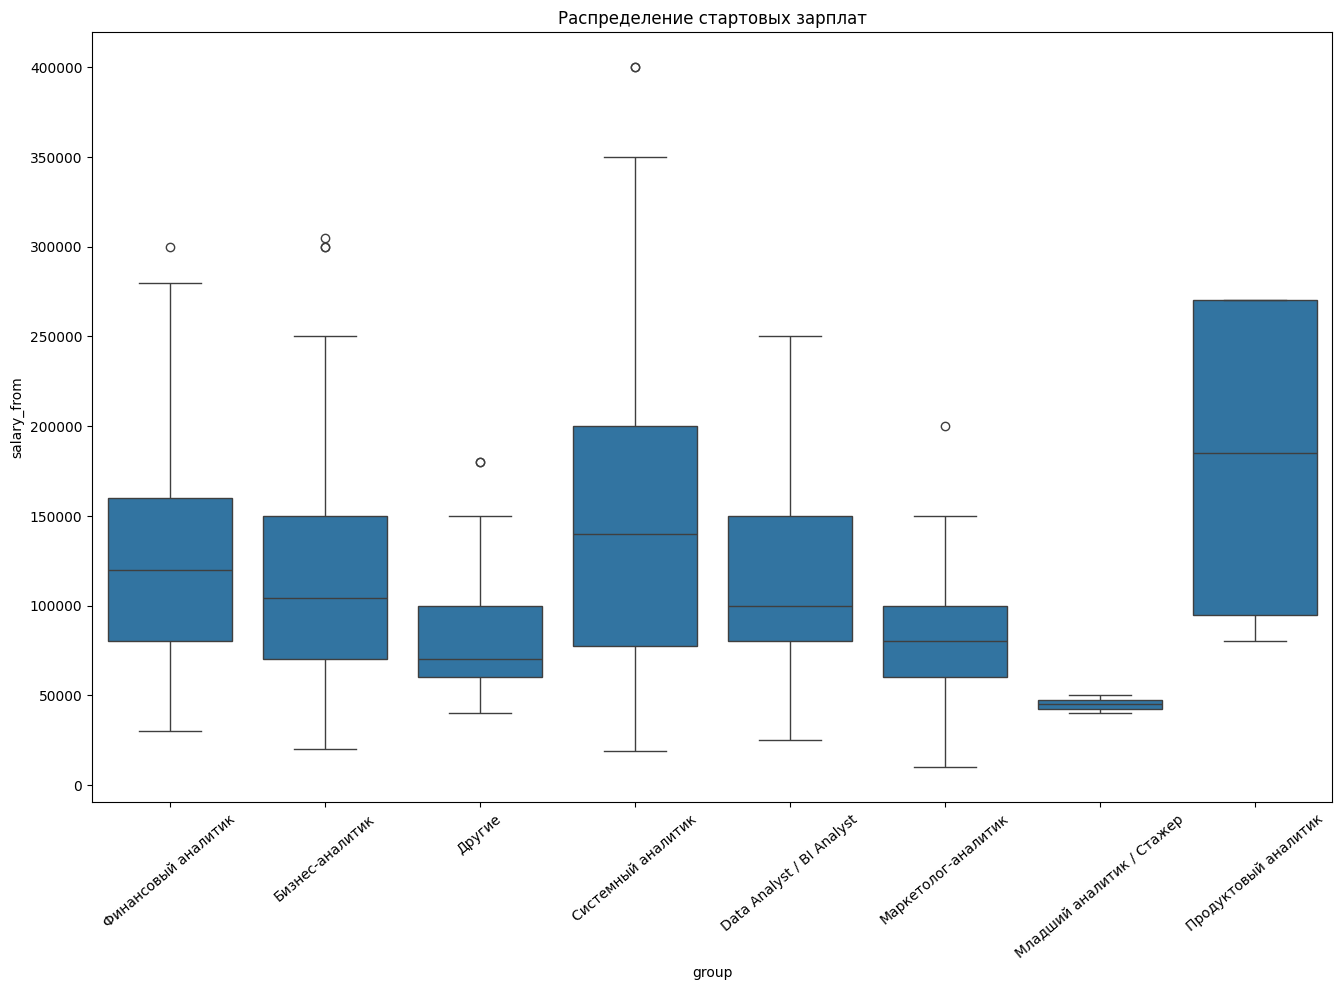

In [133]:
# рассмотрим разброс стартовых зарплат среди разных групп аналитиков
fig = plt.figure(figsize=(16, 10))
sns.boxplot(data=df_rub, x=df_rub['group'], y=df_rub['salary_from'])
plt.xticks(rotation=40)
plt.title('Распределение стартовых зарплат')
plt.show()

- Наиболее низкая стартовая зарплата ожидаемо у младших аналитиков и начинающих специалистов около 45 тыс. руб., она также имеет узкий диапазон распределения, но выборка маленька
- Наиболее высокая медианная стартовая зарплата у продуктовых аналитиков в районе 180 тыс, зарплата имеет широкий диапазон распределния, но выборка этих специалистов в нашем датасете маленькая
- Системные аналитики также имеют высокую стартовую зарплату, но размах меньше, однако есть отдельные вакансии с высокими зарплатами до 400 тыс.руб.
- Финансовые и бизнес аналитики имеют медианную зарплату в районе 100-120 тыс.руб. 
-  аналитики данных/bi-analyst имеют более низкую медианную стартовую зарплату около 100 тыс., но размах их зарплат на уровне финансовых и бизнес-аналитиков 
-  Маркетологи-аналитики имеют более низкую медианную зарплату около 80 тыс.руб. и значительно ниже разброс

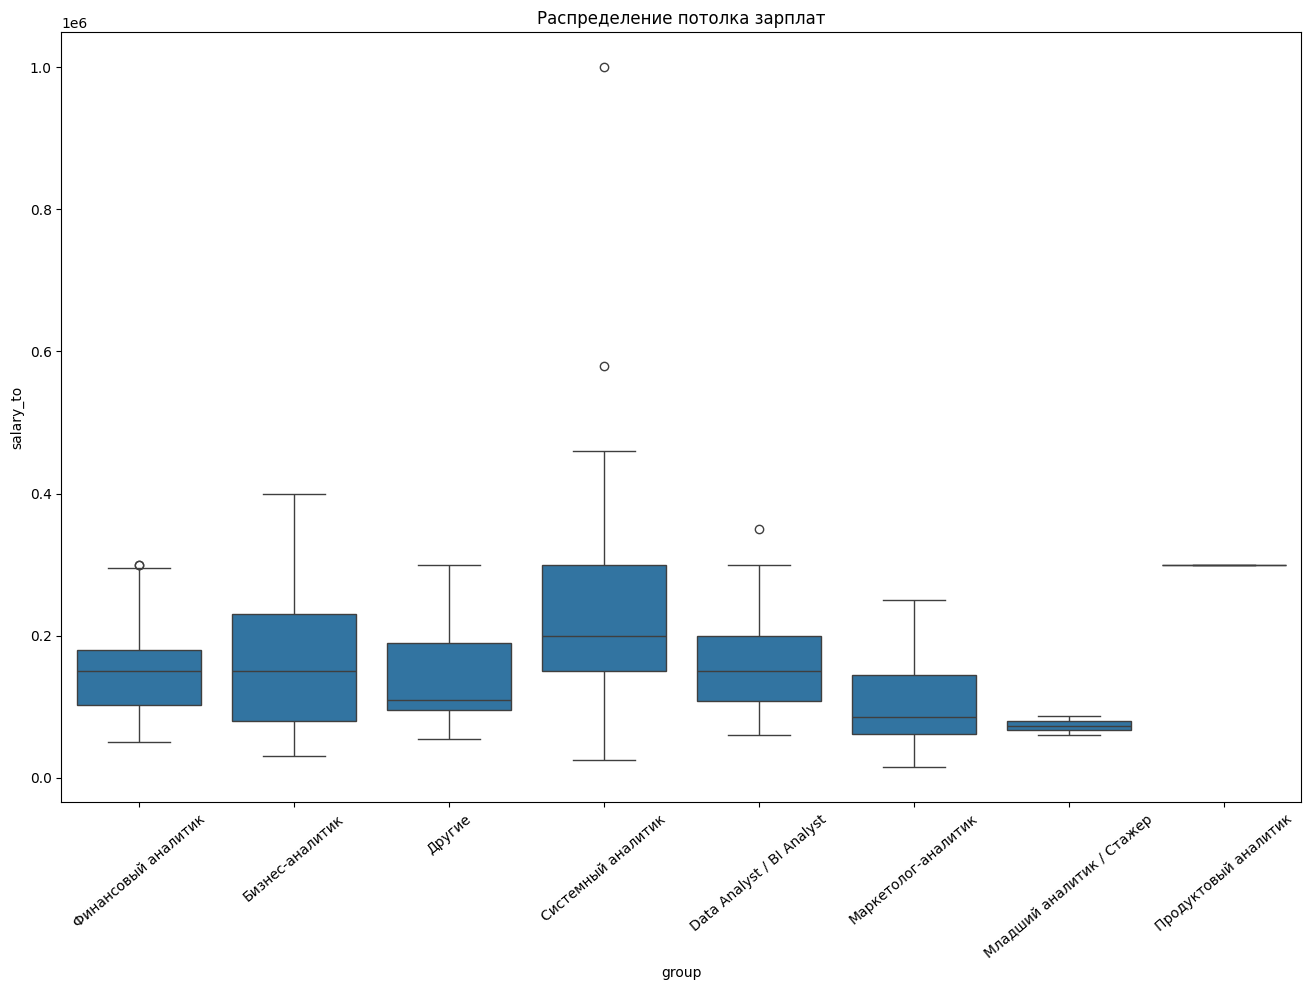

In [134]:
# рассмотрим разброс потолка зарплат среди разных групп аналитиков
fig = plt.figure(figsize=(16, 10))
sns.boxplot(data=df_rub, x=df_rub['group'], y=df_rub['salary_to'])
plt.xticks(rotation=40)
plt.title('Распределение потолка зарплат')
plt.show()

- высокий потолок зарплат у системных аналитиков, около 200 тыс. руб., у них же самый большой диапазон зарплат и выбросы встречаются в районе 1 млн. руб.
- наиболее низкий потолок зарплат у начинающих специалистов, 75 тыс.руб., но у маркетологов-аналитиков он примерно на том же уровне в районе 80 тыс. руб.
- у продуктовых аналитиков также высокий медианный потолок зарплат около 300, но маленькая выборка
- У финансовых, бизнес и дата аналитиков медианная зарплата примерно на одном уровне, но у бизнес-аналитика шире диапазон 

In [135]:
df_new.query('group=="Продуктовый аналитик"')

,id,premium,name,has_test,area,salary,alternate_url,employer,snippet,schedule,...,employer_name,snippet_requirement,snippet_responsibility,schedule_name,experience_name,employment_name,salary_from,salary_to,salary_curr,group
96,106507113,False,Product Analyst / Продуктовый Аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/106507113,"{'id': '4469213', 'name': 'нетмонет', 'url': '...",{'requirement': 'Уверенные знания <highlightte...,"{'id': 'remote', 'name': 'Удаленная работа'}",...,нетмонет,Уверенные знания <highlighttext>SQL</highlight...,Большой простор для реализации своего видения ...,Удаленная работа,От 1 года до 3 лет,Полная занятость,NaN,NaN,None,Продуктовый аналитик
129,105067348,False,Product Analyst (IGaming),False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/105067348,"{'id': '9071439', 'name': 'Green Code', 'url':...",{'requirement': 'Опыт работы в области <highli...,"{'id': 'remote', 'name': 'Удаленная работа'}",...,Green Code,Опыт работы в области <highlighttext>продуктов...,Сбор <highlighttext>данных</highlighttext> по ...,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,None,Продуктовый аналитик
207,104999877,False,Product Analyst / Продуктовый аналитик (удаленно),False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/104999877,"{'id': '816144', 'name': 'ВкусВилл', 'url': 'h...",{'requirement': 'Уверенно знаешь <highlighttex...,"{'id': 'remote', 'name': 'Удаленная работа'}",...,ВкусВилл,Уверенно знаешь <highlighttext>SQL</highlightt...,Анализ <highlighttext>данных</highlighttext> о...,Удаленная работа,От 1 года до 3 лет,Полная занятость,NaN,NaN,None,Продуктовый аналитик
434,105781970,False,Product Analyst (e-commerce),False,"{'id': '53', 'name': 'Краснодар', 'url': 'http...",None,https://hh.ru/vacancy/105781970,"{'id': '49357', 'name': 'МАГНИТ, Розничная сет...",{'requirement': '...<highlighttext>данных</hig...,"{'id': 'flexible', 'name': 'Гибкий график'}",...,"МАГНИТ, Розничная сеть",...<highlighttext>данных</highlighttext>. Опыт...,Улучшать пользовательский опыт на базе <highli...,Гибкий график,От 3 до 6 лет,Полная занятость,NaN,NaN,None,Продуктовый аналитик
624,103039797,False,Продуктовый аналитик / product analyst middle/...,True,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/103039797,"{'id': '3776', 'name': 'МТС', 'url': 'https://...",{'requirement': 'По необходимости строить мате...,"{'id': 'fullDay', 'name': 'Полный день'}",...,МТС,По необходимости строить математические модели...,...существующие <highlighttext>продуктовые</hi...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,None,Продуктовый аналитик
629,106320435,False,Product Analyst,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/106320435,"{'id': '5080432', 'name': 'ПЛОНК', 'url': 'htt...",{'requirement': 'Опыт на аналогичной должности...,"{'id': 'fullDay', 'name': 'Полный день'}",...,ПЛОНК,Опыт на аналогичной должности. Понимание основ...,<highlighttext>Аналитика</highlighttext> и сбо...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,None,Продуктовый аналитик
817,90601046,False,Аналитик продукта в категорийную команду Joom ...,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,https://hh.ru/vacancy/90601046,"{'id': '2801530', 'name': 'Joom', 'url': 'http...",{'requirement': '...<highlighttext>данных</hig...,"{'id': 'flexible', 'name': 'Гибкий график'}",...,Joom,...<highlighttext>данных</highlighttext>. Умен...,Проведение исследований: поиск точек роста в т...,Гибкий график,От 3 до 6 лет,Полная занятость,NaN,NaN,None,Продуктовый аналитик
950,105123280,False,Middle Product Analyst,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 270000, 'to': 300000, 'currency': 'RU...",https://hh.ru/vacancy/105123280,"{'id': '1583540', 'name': 'Пикабу', 'url': 'ht...",{'requirement': 'Опыт работы в качестве <highl...,"{'id': 'fullDay', 'name': 'П

In [136]:
df_usd=df_new.query('salary_curr=="USD"')

In [137]:
df_usd

,id,premium,name,has_test,area,salary,alternate_url,employer,snippet,schedule,...,employer_name,snippet_requirement,snippet_responsibility,schedule_name,experience_name,employment_name,salary_from,salary_to,salary_curr,group
26,106056041,False,Финансовый аналитик (Бали),False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 2000, 'to': None, 'currency': 'USD', ...",https://hh.ru/vacancy/106056041,"{'id': '4798148', 'name': 'База', 'url': 'http...",{'requirement': 'Опыт самостоятельной разработ...,"{'id': 'remote', 'name': 'Удаленная работа'}",...,База,Опыт самостоятельной разработки финансовых мод...,Разработка и сопровождение финансовых моделей ...,Удаленная работа,Нет опыта,Полная занятость,2000.0,NaN,USD,Финансовый аналитик
97,106092019,False,Product Data Analyst / Game Analyst,False,"{'id': '104', 'name': 'Челябинск', 'url': 'htt...","{'from': 600, 'to': 900, 'currency': 'USD', 'g...",https://hh.ru/vacancy/106092019,"{'id': '2832681', 'name': 'ХЭППИ ГЕЙМС СТУДИО'...",{'requirement': 'Понимание ключевых маркетинго...,"{'id': 'remote', 'name': 'Удаленная работа'}",...,ХЭППИ ГЕЙМС СТУДИО,Понимание ключевых маркетинговых и <highlightt...,Анализ удачности игровых апдейтов. Формулировк...,Удаленная работа,От 1 года до 3 лет,Полная занятость,600.0,900.0,USD,Data Analyst / BI Analyst
220,105907189,False,Business Analyst,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 2000, 'to': 2500, 'currency': 'USD', ...",https://hh.ru/vacancy/105907189,"{'id': '1469299', 'name': 'Шарп Девелоперс', '...",{'requirement': 'Работать предстоит в междунар...,"{'id': 'remote', 'name': 'Удаленная работа'}",...,Шарп Девелоперс,"Работать предстоит в международной команде, по...",Проектирование внешних методов API системы (пр...,Удаленная работа,От 3 до 6 лет,Полная занятость,2000.0,2500.0,USD,Бизнес-аналитик
370,106220006,False,BI - Аналитик (BI Analyst),True,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 1500, 'to': None, 'currency': 'USD', ...",https://hh.ru/vacancy/106220006,"{'id': '10197031', 'name': 'Бакирова Алсу Альм...",{'requirement': 'Высшее образование в информац...,"{'id': 'remote', 'name': 'Удаленная работа'}",...,Бакирова Алсу Альмировна,Высшее образование в информационных технология...,...в <highlighttext>bi</highlighttext>-системе...,Удаленная работа,От 3 до 6 лет,Полная занятость,1500.0,NaN,USD,Data Analyst / BI Analyst
1062,106374675,False,Финансовый аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 2000, 'to': None, 'currency': 'USD', ...",https://hh.ru/vacancy/106374675,"{'id': '180028', 'name': 'Finstar Financial Gr...",{'requirement': 'Высшее образование. Опыт рабо...,"{'id': 'fullDay', 'name': 'Полный день'}",...,Finstar Financial Group,Высшее образование. Опыт работы <highlighttext...,Кросс-функциональная ad-hoc <highlighttext>ана...,Полный день,От 3 до 6 лет,Полная занятость,2000.0,NaN,USD,Финансовый аналитик
1195,106213387,False,Marketing Analyst(Crypto),False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 1700, 'to': 2500, 'currency': 'USD', ...",https://hh.ru/vacancy/106213387,"{'id': '4221760', 'name': 'CLS Global', 'url':...",{'requirement': 'Английский язык от C1. Опыт в...,"{'id': 'remote', 'name': 'Удаленная работа'}",...,CLS Global,Английский язык от C1. Опыт в маркетинге от 1 ...,Разработка маркетинговых стратегий. Коммуникац...,Удаленная работа,От 1 года до 3 лет,Полная занятость,1700.0,2500.0,USD,Маркетолог-аналитик
1438,104632582,False,Senior system analyst,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 4000, 'currency': 'USD', ...",https://hh.ru/vacancy/104632582,"{'id': '5402004', 'name': 'Lenkep recruitment'...",{'requirement': 'Навыки работы с базами <highl...,"{'id': 'remote', 'name': 'Удаленная работа'}",...,Lenkep recruitment,Навыки работы с базами <highlighttext>данных</...,Анализ требований к информационным системам и ...,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,4000.0,USD,С

In [138]:
df_euro=df_new.query('salary_curr=="EUR"')

In [139]:
df_euro

,id,premium,name,has_test,area,salary,alternate_url,employer,snippet,schedule,...,employer_name,snippet_requirement,snippet_responsibility,schedule_name,experience_name,employment_name,salary_from,salary_to,salary_curr,group
42,106432971,False,BI Аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 4000, 'to': None, 'currency': 'EUR', ...",https://hh.ru/vacancy/106432971,"{'id': '2066667', 'name': 'Топассистент', 'url...",{'requirement': 'опыт работы в роли <highlight...,"{'id': 'fullDay', 'name': 'Полный день'}",...,Топассистент,опыт работы в роли <highlighttext>аналитика</h...,сбор и интеграция <highlighttext>данных</highl...,Полный день,От 3 до 6 лет,Полная занятость,4000.0,NaN,EUR,Data Analyst / BI Analyst
181,105805294,False,Бизнес-аналитик,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 3000, 'to': 4000, 'currency': 'EUR', ...",https://hh.ru/vacancy/105805294,"{'id': '11336399', 'name': 'WeCan', 'url': 'ht...",{'requirement': 'Опыт работы с онлайн-сервисам...,"{'id': 'remote', 'name': 'Удаленная работа'}",...,WeCan,Опыт работы с онлайн-сервисами поиска специали...,Постоянное улучшение функционала платформы на ...,Удаленная работа,Более 6 лет,Полная занятость,3000.0,4000.0,EUR,Бизнес-аналитик


В выборке есть всего 25 вакансий в валюте, их для анализа использовать не будем

C:\Users\sam19\AppData\Local\Temp\ipykernel_7312\2321677900.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rub['experience_name'] = pd.Categorical(df_rub['experience_name'], categories=experience_order, ordered=True)


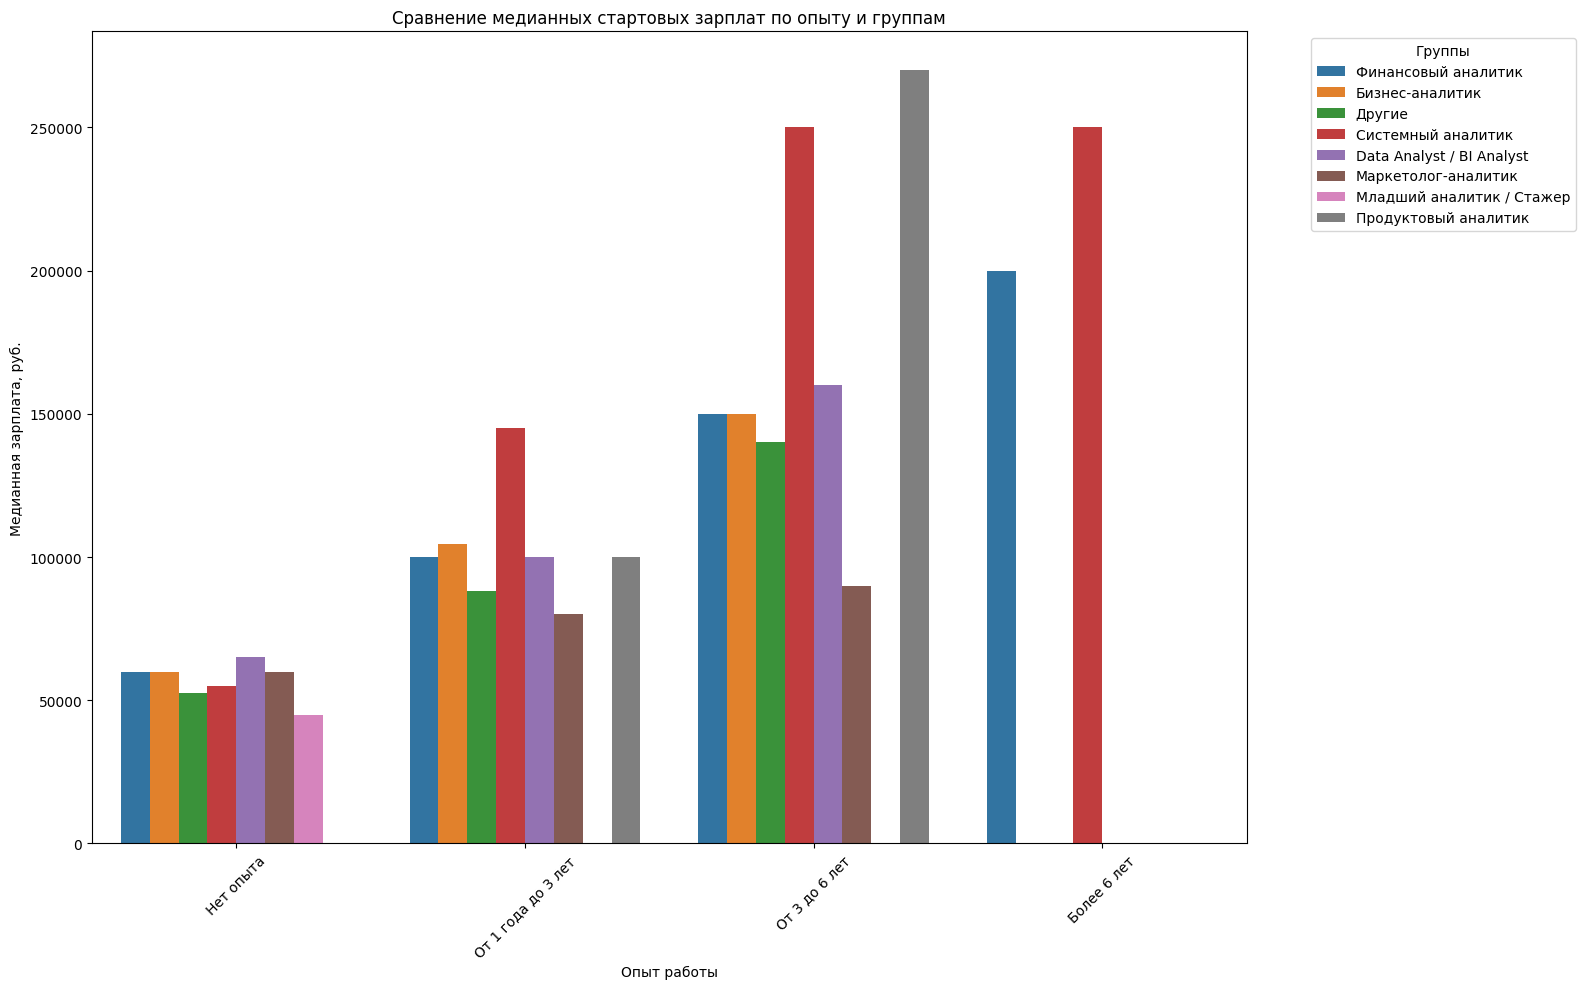

In [144]:
# сравним медианные зарплаты среди разных аналитиков в зависимости от опыта работы
experience_order = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']

# Переопределение категорий с правильным порядком
df_rub['experience_name'] = pd.Categorical(df_rub['experience_name'], categories=experience_order, ordered=True)

# Построение графика с правильным порядком
plt.figure(figsize=(16, 10))
sns.barplot(
    data=df_rub,
    x='experience_name',
    y='salary_from',
    hue='group',
    estimator=np.median,
    errorbar=None
)
plt.xlabel('Опыт работы')
plt.ylabel('Медианная зарплата, руб.')
plt.title('Сравнение медианных стартовых зарплат по опыту и группам')
plt.xticks(rotation=45)
plt.legend(title='Группы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Для вакансий без опыта стартовая зарплата во всех группах аналитиков находится примерно на одном уровне в районе 60-70 тыс.руб
- Наиболее существенный рост зарплаты с опытом 1-3 года наблюдается у системных аналитиков
- у специалистов с опытом 3-6 лет наиболее высокие зарплаты имеют системные и продуктовые аналитики, но у продуктовых аналитиков маленькая выборка
- с опытом более 6 лет вакансии только для финансовых и системных аналитиков, при этом нет существенного увеличения зарплаты

C:\Users\sam19\AppData\Local\Temp\ipykernel_7312\464055394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rub['experience_name'] = pd.Categorical(df_rub['experience_name'], categories=experience_order, ordered=True)


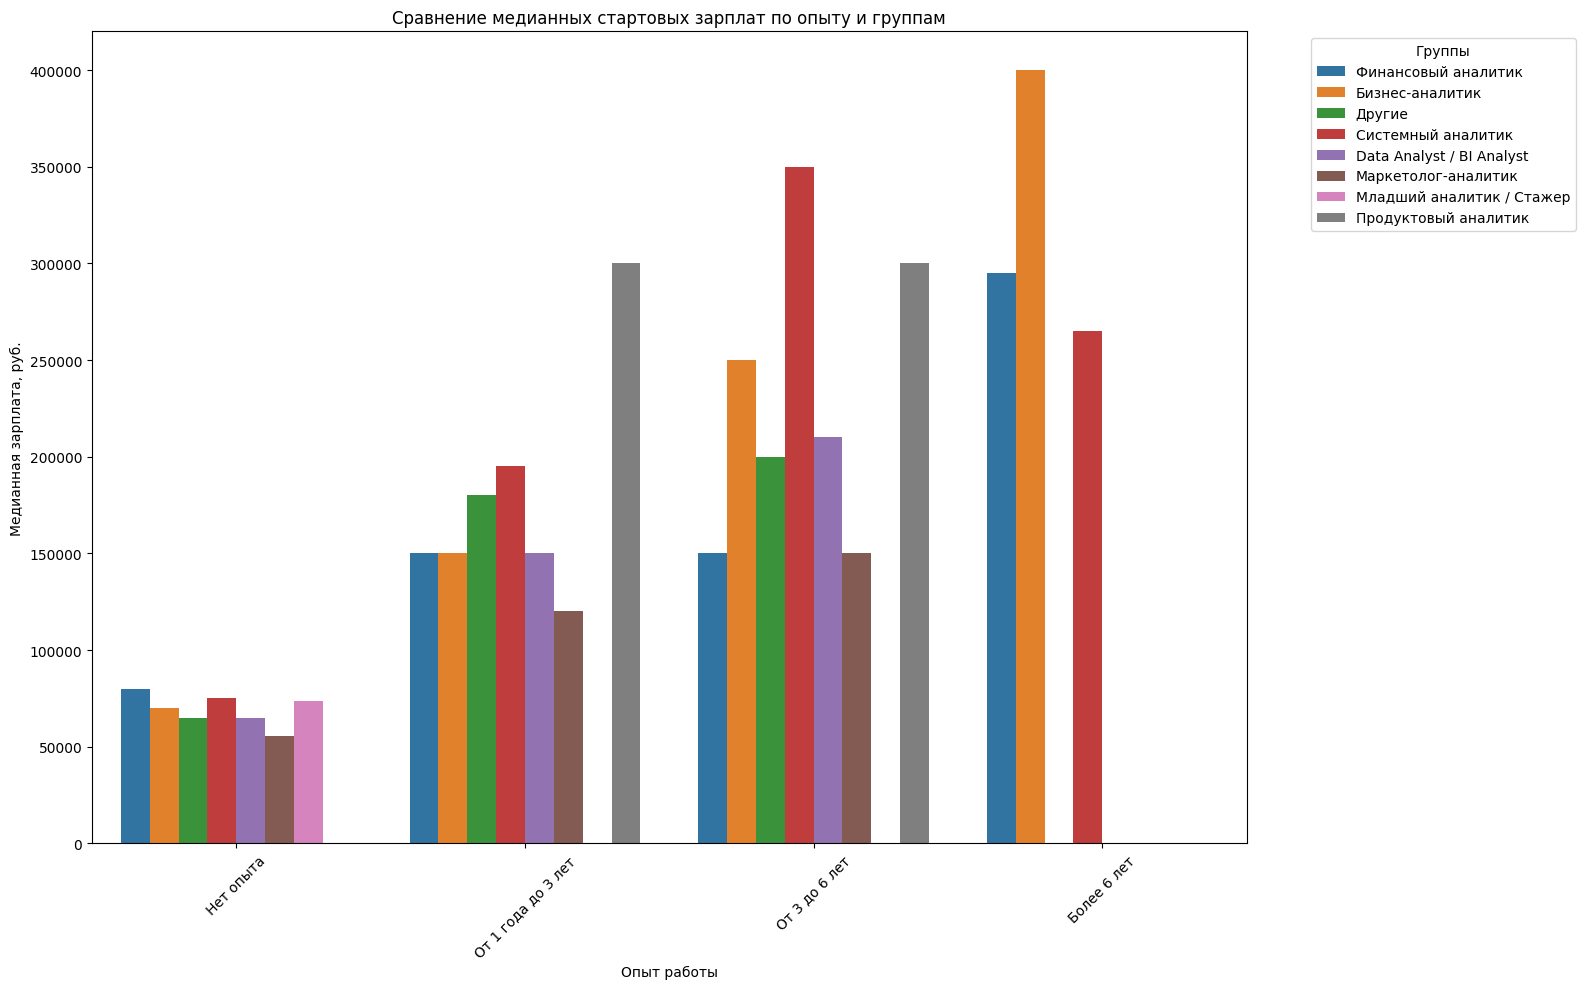

In [145]:
# сравним медианные зарплаты среди разных аналитиков в зависимости от опыта работы
experience_order = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']

# Переопределение категорий с правильным порядком
df_rub['experience_name'] = pd.Categorical(df_rub['experience_name'], categories=experience_order, ordered=True)

# Построение графика с правильным порядком
plt.figure(figsize=(16, 10))
sns.barplot(
    data=df_rub,
    x='experience_name',
    y='salary_to',
    hue='group',
    estimator=np.median,
    errorbar=None
)
plt.xlabel('Опыт работы')
plt.ylabel('Медианная зарплата, руб.')
plt.title('Сравнение медианных стартовых зарплат по опыту и группам')
plt.xticks(rotation=45)
plt.legend(title='Группы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- потолок зарплат для вакансий без опыта также находится примерно на одном уровне в районе 80 тыс. руб.
- Так же как и со стартовой зарплатой с опытом 1-3 года наиболее высокий прирост показывают системные и продуктовые аналитики
- С увеличением опыта наиболее высокие зарплаты имеют системные и бизнес-аналитики 

In [146]:
# рассмотрим топ-городов с наибольши количеством вакансий
top_city=df_new['area_name'].value_counts().head(10)

In [147]:
top_city

area_name
Москва             1217
Санкт-Петербург     241
Новосибирск          56
Екатеринбург         46
Казань               34
Нижний Новгород      32
Ростов-на-Дону       22
Краснодар            21
Самара               20
Тюмень               18
Name: count, dtype: int64

Наибольшее количество вакансий в крупных городах, основная часть выборки из Москвы

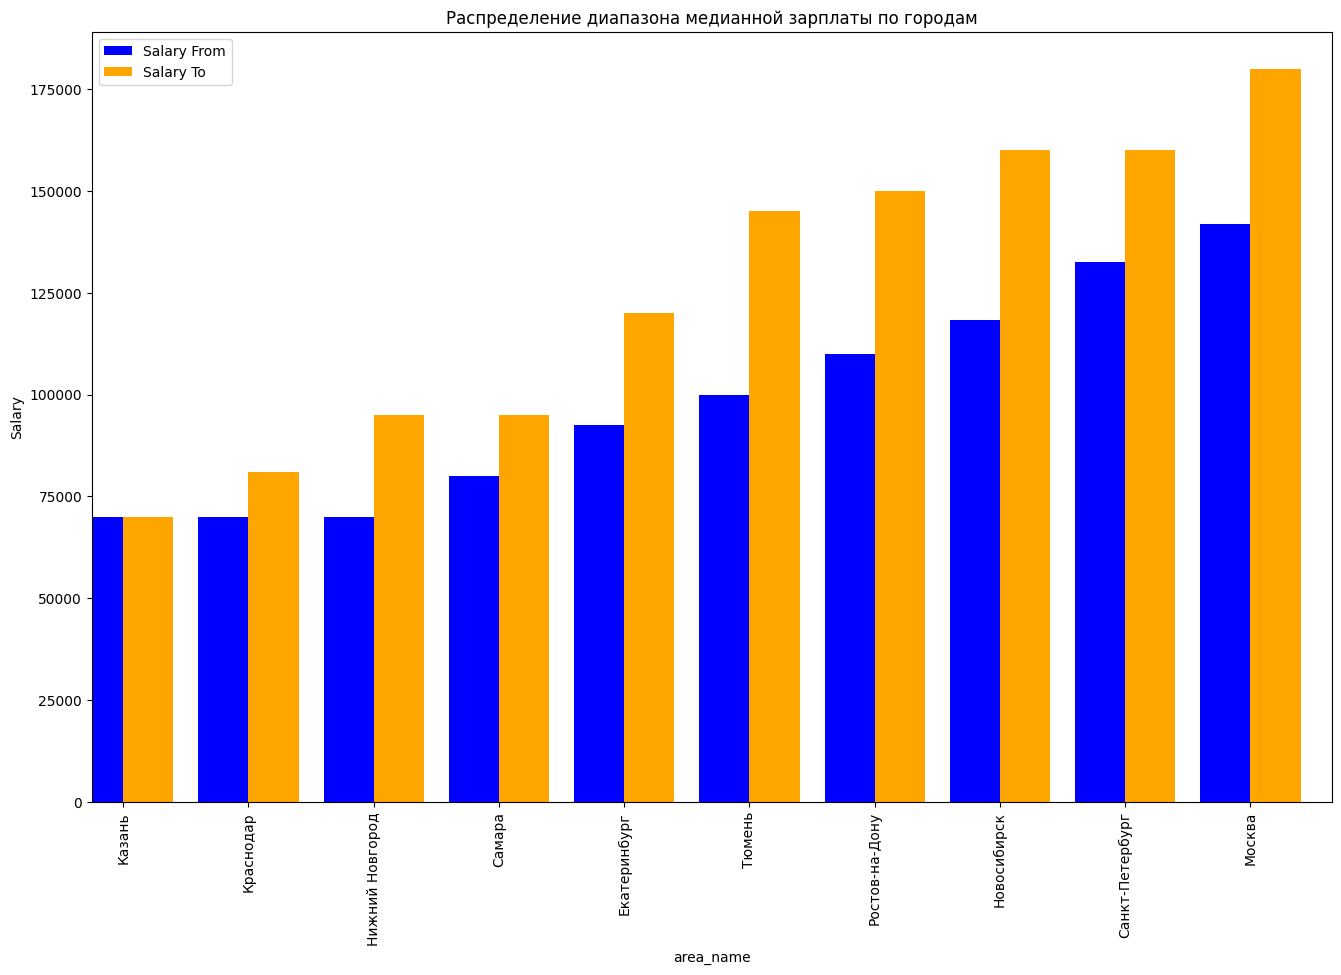

In [148]:
# рассмотрим как распределена медианная зарплата по городам
fig, ax = plt.subplots(figsize=(16, 10))

# Построение графика для 'salary_from'
df_new.query('area_name in @top_city.index').groupby('area_name')['salary_from'].median().sort_values().plot(kind='bar', color='blue', ax=ax, position=1, width=0.4, label='Salary From')

# Построение графика для 'salary_to'
df_new.query('area_name in @top_city.index').groupby('area_name')['salary_to'].median().sort_values().plot(kind='bar', color='orange', ax=ax, position=0, width=0.4, label='Salary To')

ax.set_ylabel('Salary')
ax.legend()
plt.title('Распределение диапазона медианной зарплаты по городам')
plt.show()

- Наиболее высокая медианная зарплата ожидаемо в Москве и составляет от 140 до 180 тыс. руб
- Наиболее низкие зарплаты в Казани, Краснодаре, Нижнем Новгороде и Самаре, от 70 до 100 тыс. руб.

In [150]:
df_no_exp=df_new.query('experience_name == "Нет опыта"')['group'].value_counts()

In [157]:
df_no_exp/df_new['group'].value_counts()

group
Data Analyst / BI Analyst    0.116788
Бизнес-аналитик              0.130117
Другие                       0.204082
Маркетолог-аналитик          0.178082
Младший аналитик / Стажер    0.900000
Продуктовый аналитик              NaN
Системный аналитик           0.113416
Финансовый аналитик          0.110000
Name: count, dtype: float64

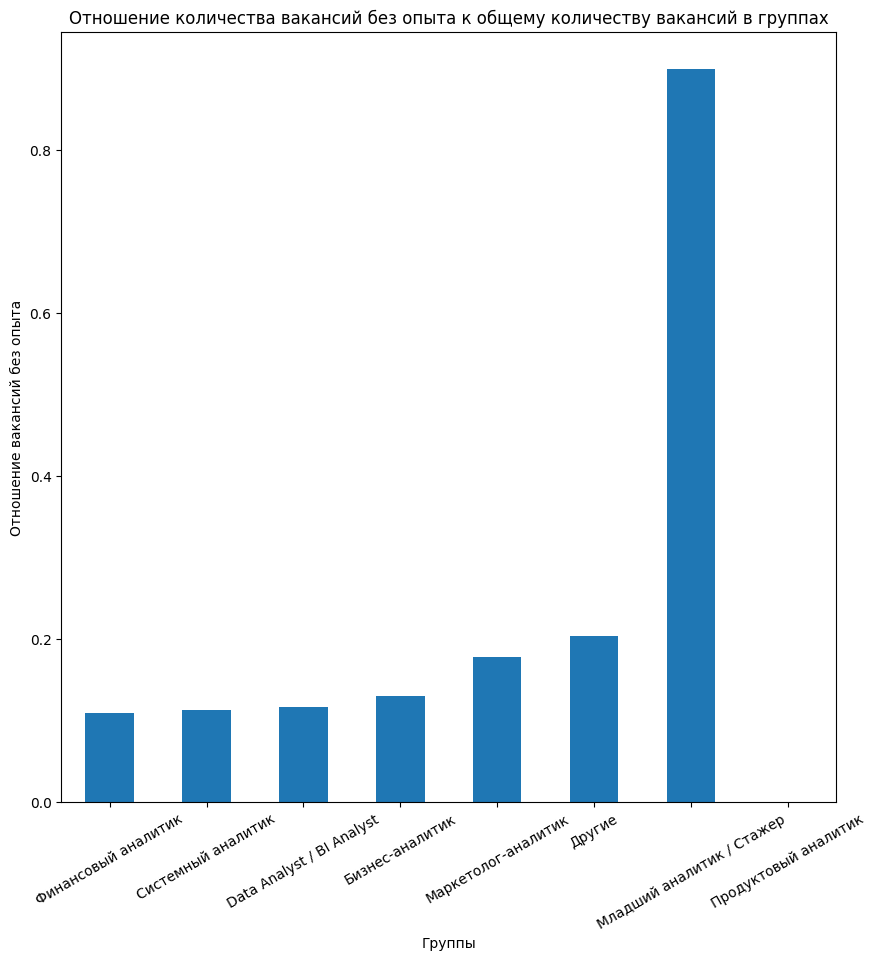

In [162]:
# рассмотрим, среди каких аналитиков больше всего не требуется опыт
df_no_exp=df_new.query('experience_name == "Нет опыта"')['group'].value_counts()
ratio=df_no_exp/df_new['group'].value_counts()
ratio.sort_values().plot(kind='bar', figsize=(10,10))
plt.xlabel('Группы')
plt.ylabel('Отношение вакансий без опыта')
plt.title('Отношение количества вакансий без опыта к общему количеству вакансий в группах')
plt.xticks(rotation=30)
plt.show()

- Для младших аналитиков и стажеров опыт в основном не требуется, но их выьорка маленькая
- для продуктовых аналитиков нет вакансий без опыта, но выборка маленькая
- в остальных вакансиях доля примерно на одном уровне 15-20% от общего числа вакансий 

In [163]:
import re

def extract_skills(text):
    skills = []
    
    # Шаблоны для извлечения навыков
    patterns = [
        # Технические навыки
        r'\bExcel\b', r'\bPowerPoint\b', r'\bSQL\b', r'\bPython\b',
        r'\bBI\b', r'\bаналитическое мышление\b', r'\bструктурирование информации\b',
        r'\bбазы данных\b', r'\bвизуализация данных\b', r'\bE-commerce\b',
        r'\bB2B\b', r'\bфинансовые модели\b', r'\bпарсинг данных\b', r'\bдэдлайны\b',
        r'\bанализ данных\b', r'\bметодологии расчета\b', r'\bHR-метрики\b',
        r'\bпроектирование бизнес-процессов\b', r'\bпроектирование ПО\b',
        r'\bBPMN\b', r'\bUML\b', r'\bлогический анализ\b',
        r'\bMicrosoft Office\b', r'\bВПР\b', r'\bQGIS\b',
        r'\bметодологии анализа\b', r'\bтеория баз данных\b', r'\bструктурировать информацию\b',
        r'\bобработка данных\b', r'\bпроектирование систем\b', r'\bпродуктовые исследования\b',
        r'\bметодологии тестирования\b', r'\bSQL-запросы\b',
        
        # Новые навыки
        r'\bобразование\b', r'\bвысшее образование\b', r'\bмагистр\b', r'\bбакалавр\b',
        r'\bзнание отрасли\b', r'\bзнание законодательства\b', r'\bопыт работы\b',
        r'\bвладение языками\b', r'\bсертификаты\b', r'\bнавыки работы в команде\b',
        r'\bуправление проектами\b', r'\bкоммуникационные навыки\b', r'\bнавыки презентации\b'
    ]
    
    # Поиск по каждому шаблону в тексте
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            skills.append(match.group(0).lower())
    
    return skills


In [168]:
df_new['snippet_requirement'] = df_new['snippet_requirement'].astype(str)

# Применение функции для извлечения навыков
df_new['skills'] = df_new['snippet_requirement'].apply(extract_skills)

In [169]:
df_new['skills']

0                       [bi, опыт работы]
1       [excel, образование, опыт работы]
2                                 [excel]
3                    [excel, опыт работы]
4              [образование, опыт работы]
                      ...                
1995                          [bpmn, uml]
1996                                   []
1997                                [sql]
1998                        [опыт работы]
1999       [sql, python, bi, опыт работы]
Name: skills, Length: 2000, dtype: object

In [170]:
all_skills = ' '.join([' '.join(skills) for skills in df_new['skills']])

In [50]:
unique_groups

array(['Финансовый аналитик', 'Бизнес-аналитик', 'IT-аналитик',
       'Системный аналитик', 'Data Analyst / BI Analyst',
       'Младший аналитик / Стажер', 'Продуктовый аналитик',
       'Маркетолог-аналитик', 'Другие'], dtype=object)

In [175]:
def word_cloud(group):
    df_group = df_new.query(f'group == "{group}"')
    all_skills = ' '.join([' '.join(skills) for skills in df_group['skills']])
    
    # Генерация облака слов
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)
    
    # Отображение облака слов
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Облако слов для группы {group}')
    plt.show()

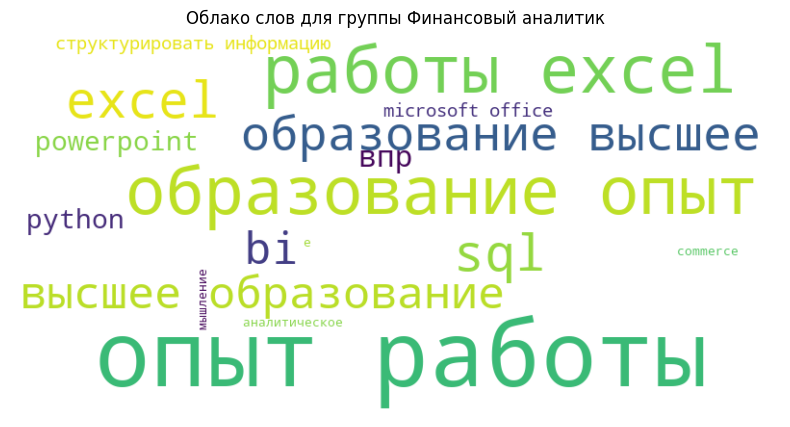

In [176]:
word_cloud('Финансовый аналитик')

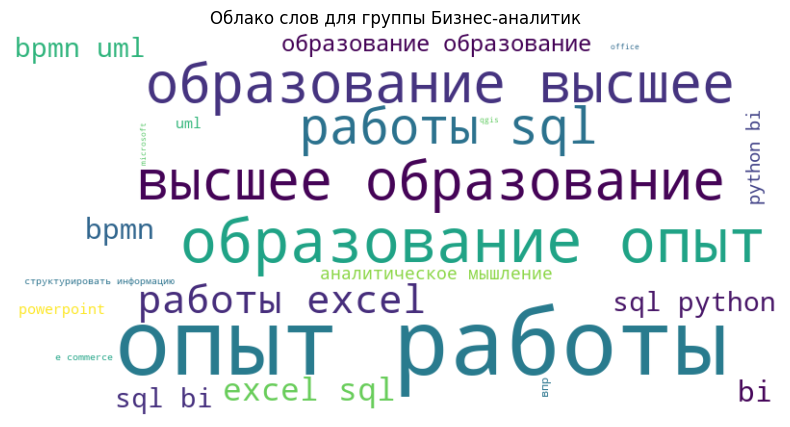

In [177]:
word_cloud('Бизнес-аналитик')

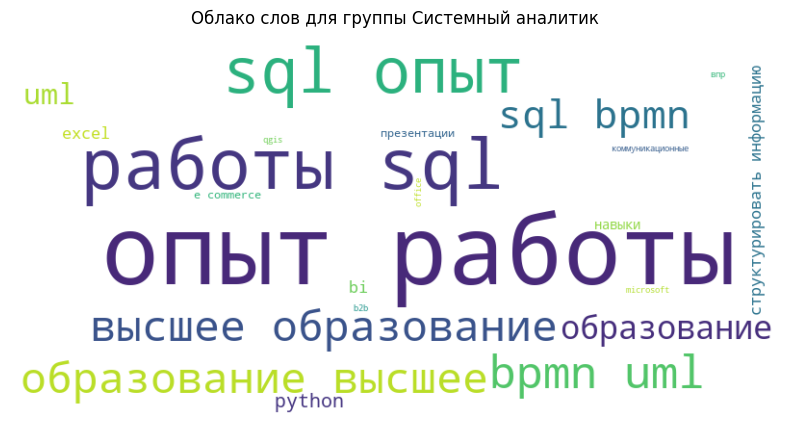

In [179]:
word_cloud('Системный аналитик')

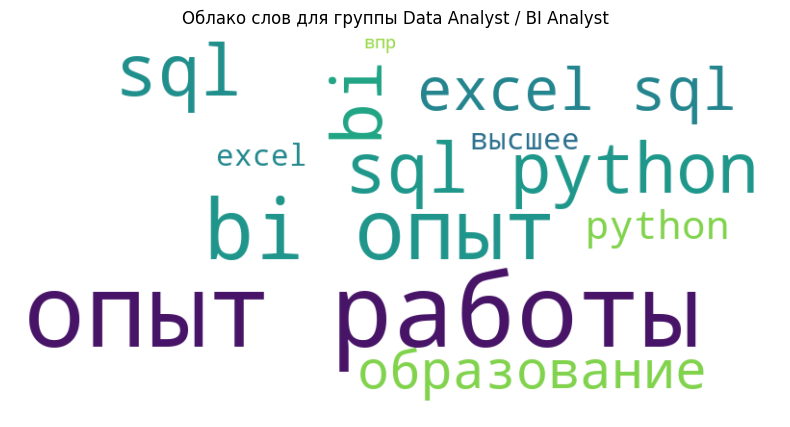

In [180]:
word_cloud('Data Analyst / BI Analyst')

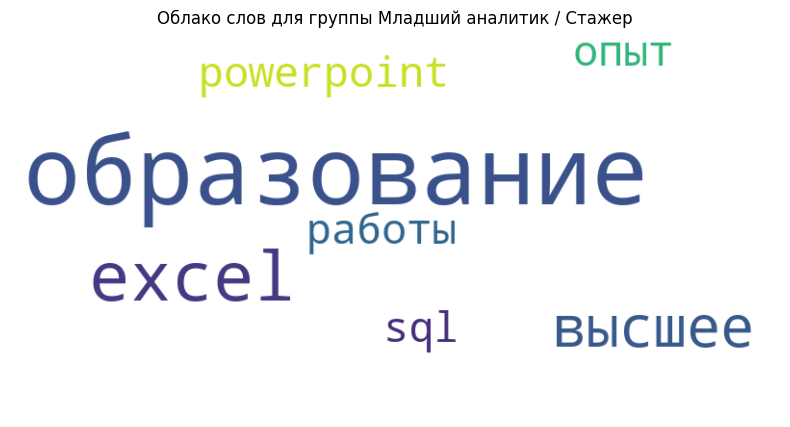

In [181]:
word_cloud('Младший аналитик / Стажер')

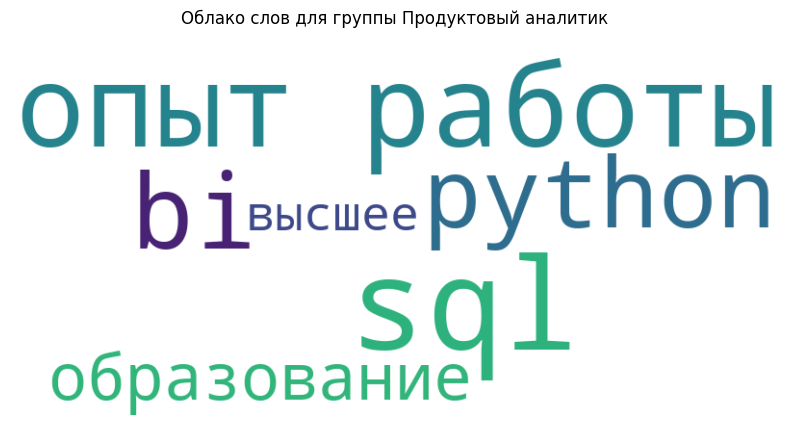

In [182]:
word_cloud('Продуктовый аналитик')

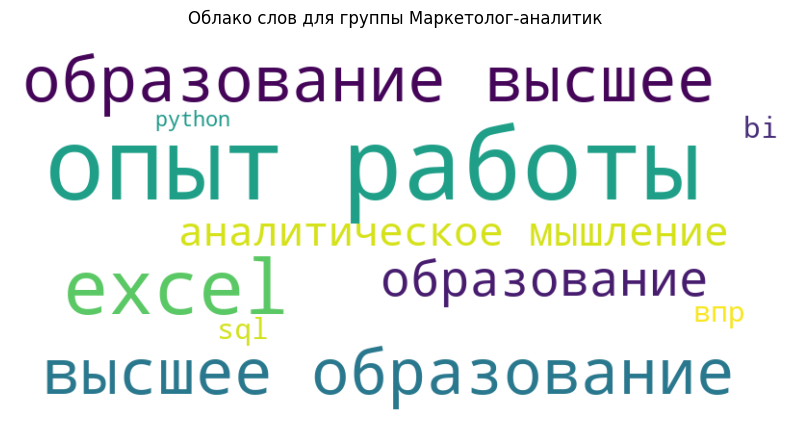

In [183]:
word_cloud('Маркетолог-аналитик')

- Для всех групп аналитиков наиболее частое требование - это опыт работы и высшее образование
- Также практически для всех аналитиков требуется знание Excel и SQL
- Наиболее часто требования Python и SQL встречается у аналитиков данных  

Выводы:

- Был написан парсер для сбора информации о вакансиях разных типов аналитиков с сайта HH;
- В выгруженных данных наибольшее количество было системных и бизнес-аналитиков
- Все аналитики были разбиты на группы
 - Наиболее низкая стартовая зарплата ожидаемо у младших аналитиков и начинающих специалистов около 45 тыс. руб., она также имеет узкий диапазон распределения, но выборка маленька
- Наиболее высокая медианная стартовая зарплата у продуктовых аналитиков в районе 180 тыс, зарплата имеет широкий диапазон распределния, но выборка этих специалистов в нашем датасете маленькая
- Системные аналитики также имеют высокую стартовую зарплату, но размах меньше, однако есть отдельные вакансии с высокими зарплатами до 400 тыс.руб.
- Финансовые и бизнес аналитики имеют медианную зарплату в районе 100-120 тыс.руб. 
-  аналитики данных/bi-analyst имеют более низкую медианную стартовую зарплату около 100 тыс., но размах их зарплат на уровне финансовых и бизнес-аналитиков 
-  Маркетологи-аналитики имеют более низкую медианную зарплату около 80 тыс.руб. и значительно ниже разброс
- высокий потолок зарплат у системных аналитиков, около 200 тыс. руб., у них же самый большой диапазон зарплат и выбросы встречаются в районе 1 млн. руб.
- наиболее низкий потолок зарплат у начинающих специалистов, 75 тыс.руб., но у маркетологов-аналитиков он примерно на том же уровне в районе 80 тыс. руб.
- у продуктовых аналитиков также высокий медианный потолок зарплат около 300, но маленькая выборка
- У финансовых, бизнес и дата аналитиков медианная зарплата примерно на одном уровне, но у бизнес-аналитика шире диапазон
- Для вакансий без опыта стартовая зарплата во всех группах аналитиков находится примерно на одном уровне в районе 60-70 тыс.руб
- Наиболее существенный рост зарплаты с опытом 1-3 года наблюдается у системных аналитиков
- у специалистов с опытом 3-6 лет наиболее высокие зарплаты имеют системные и продуктовые аналитики, но у продуктовых аналитиков маленькая выборка
- с опытом более 6 лет вакансии только для финансовых и системных аналитиков, при этом нет существенного увеличения зарплаты
- потолок зарплат для вакансий без опыта также находится примерно на одном уровне в районе 80 тыс. руб.
- Так же как и со стартовой зарплатой с опытом 1-3 года наиболее высокий прирост показывают системные и продуктовые аналитики
- С увеличением опыта наиболее высокие зарплаты имеют системные и бизнес-аналитики
- Наиболее высокая медианная зарплата ожидаемо в Москве и составляет от 140 до 180 тыс. руб
- Наиболее низкие зарплаты в Казани, Краснодаре, Нижнем Новгороде и Самаре, от 70 до 100 тыс. руб.
- Для младших аналитиков и стажеров опыт в основном не требуется, но их выборка маленькая
- для продуктовых аналитиков нет вакансий без опыта, но выборка маленькая
- в остальных вакансиях доля примерно на одном уровне 15-20% от общего числа вакансий
- Для всех групп аналитиков наиболее частое требование - это опыт работы и высшее образование
- Также практически для всех аналитиков требуется знание Excel и SQL
- Наиболее часто требования по Python и SQL встречается у аналитиков данных  